<a href="https://www.kaggle.com/code/kacperma/credit-card-approvals?scriptVersionId=153084905" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Credit Card Approval Prediction

# Data analysis & preprocessing

## 1.1 Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import seaborn as sns


# 1.2 Data analysis

In [2]:
df_application = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
df_application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [3]:
df_credit = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')
df_credit.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [4]:
print("Applications: \n", df_application.nunique())
print("Record: \n", df_credit.nunique())

Applications: 
 ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64
Record: 
 ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [5]:
# Calculate the percentage of empty values in each row
empty_percentage = [df_application.isna().mean(axis=0) * 100, df_credit.isna().mean(axis=0) * 100]
print("Applications:\n", empty_percentage[0], "\n", "Record:\n", empty_percentage[1])

Applications:
 ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64 
 Record:
 ID                0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64


In [6]:
# deleting unnecessary features 
# FLAG_MOBILE only has one value so it won't contribute to the model
# GENDER - Factors such as gender, ethnicity, religion should not be used to introduce biases
df_application.drop(columns=['FLAG_MOBIL', 'CODE_GENDER'], inplace=True)

# changing binary text features into numbers
for column in df_application.columns:
    if 'FLAG' in column:
        df_application[column] = df_application[column].replace({'Y': 1, 'N': 0})
        new_column_name = column.replace('FLAG_', '')
        df_application.rename(columns={column: new_column_name}, inplace=True)


In [7]:
df_application.describe()

,ID,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,WORK_PHONE,PHONE,EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,438557.000000,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.371897,0.693351,0.427390,1.875243e+05,-15997.904649,60563.675328,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.483312,0.461103,0.724882,1.100869e+05,4185.030007,138767.799647,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,0.000000,0.000000,2.610000e+04,-25201.000000,-17531.000000,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,0.000000,0.000000,1.215000e+05,-19483.000000,-3103.000000,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.000000,0.000000,1.607805e+05,-15630.000000,-1467.000000,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,1.000000,1.000000,2.250000e+05,-12514.000000,-371.000000,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,1.000000,1.000000,19.000000,6.750000e+06,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000


In [8]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   OWN_CAR              438557 non-null  int64  
 2   OWN_REALTY           438557 non-null  int64  
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  WORK_PHONE           438557 non-null  int64  
 12  PHONE                438557 non-null  int64  
 13  EMAIL                438557 non-null  int64  
 14  OCCUPATION_TYPE      304354 non-null  object 
 15  CNT_FAM_MEMBERS  

In [9]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


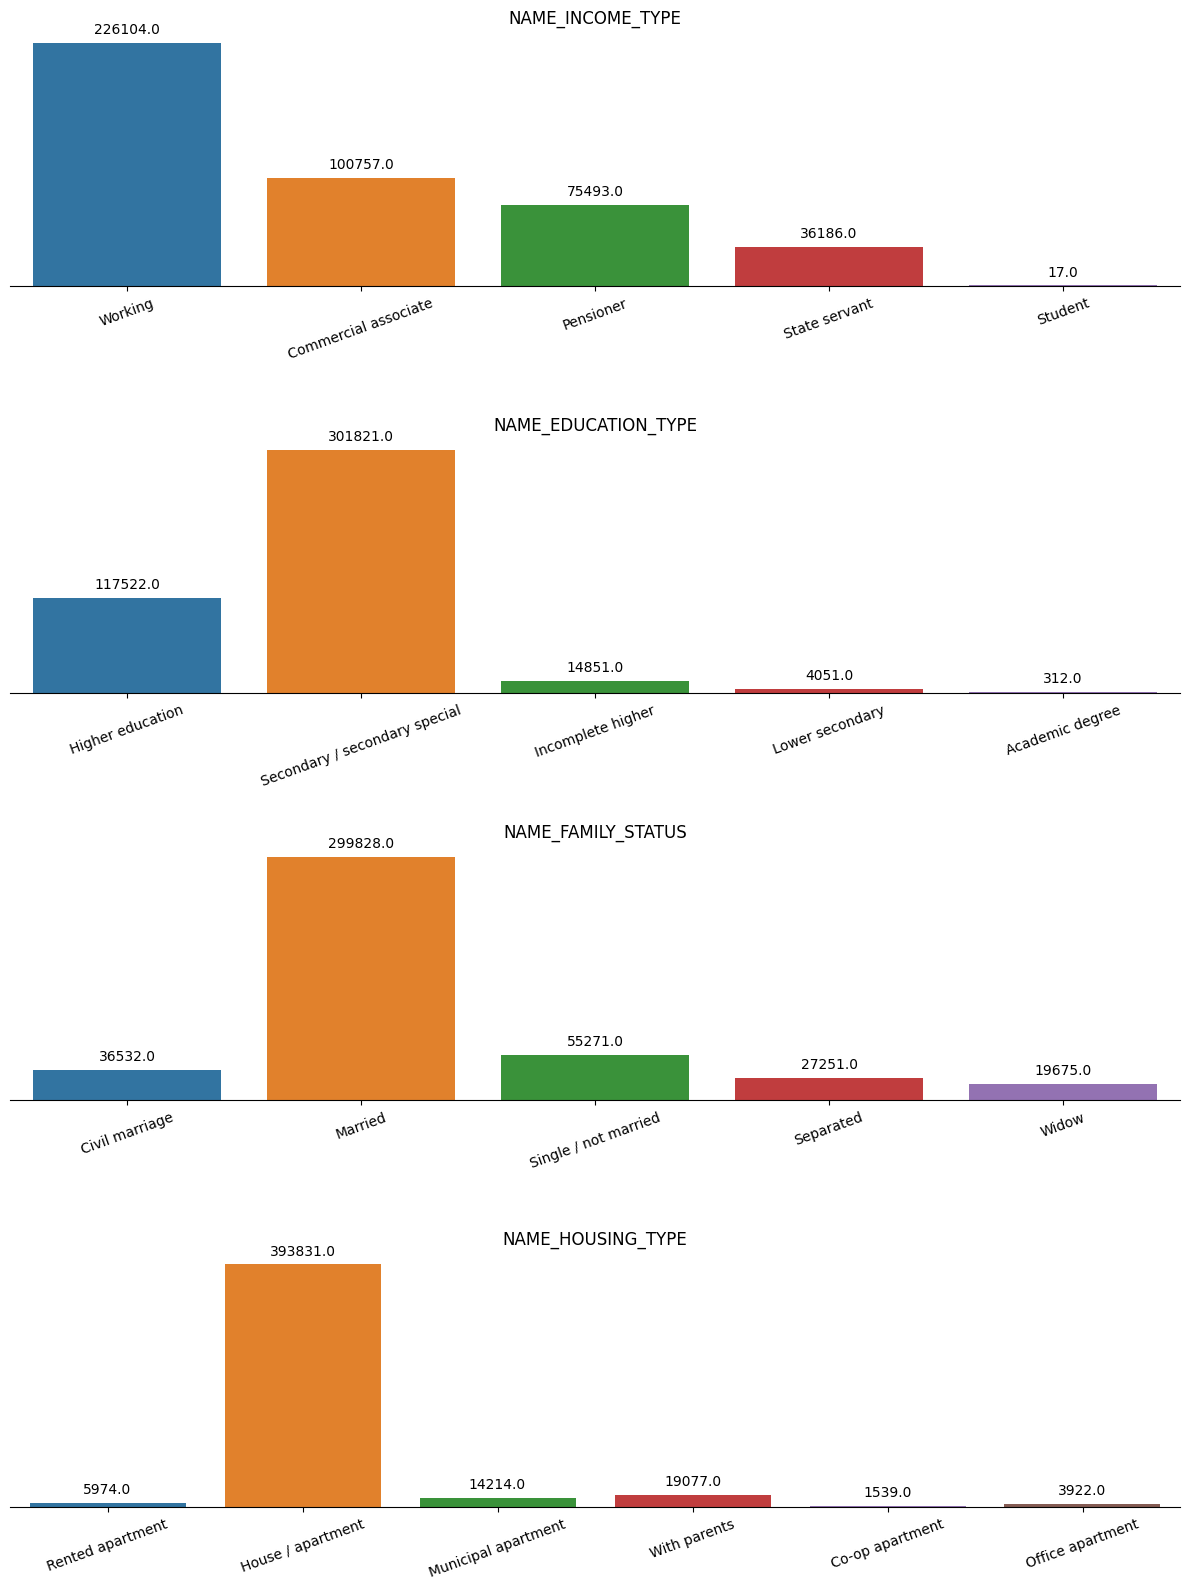

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))
columns_to_plot = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 1, i+1)
    ax = sns.countplot(x=column, data=df_application)
    ax.set(yticklabels=[])
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=20)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks([])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
   

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()

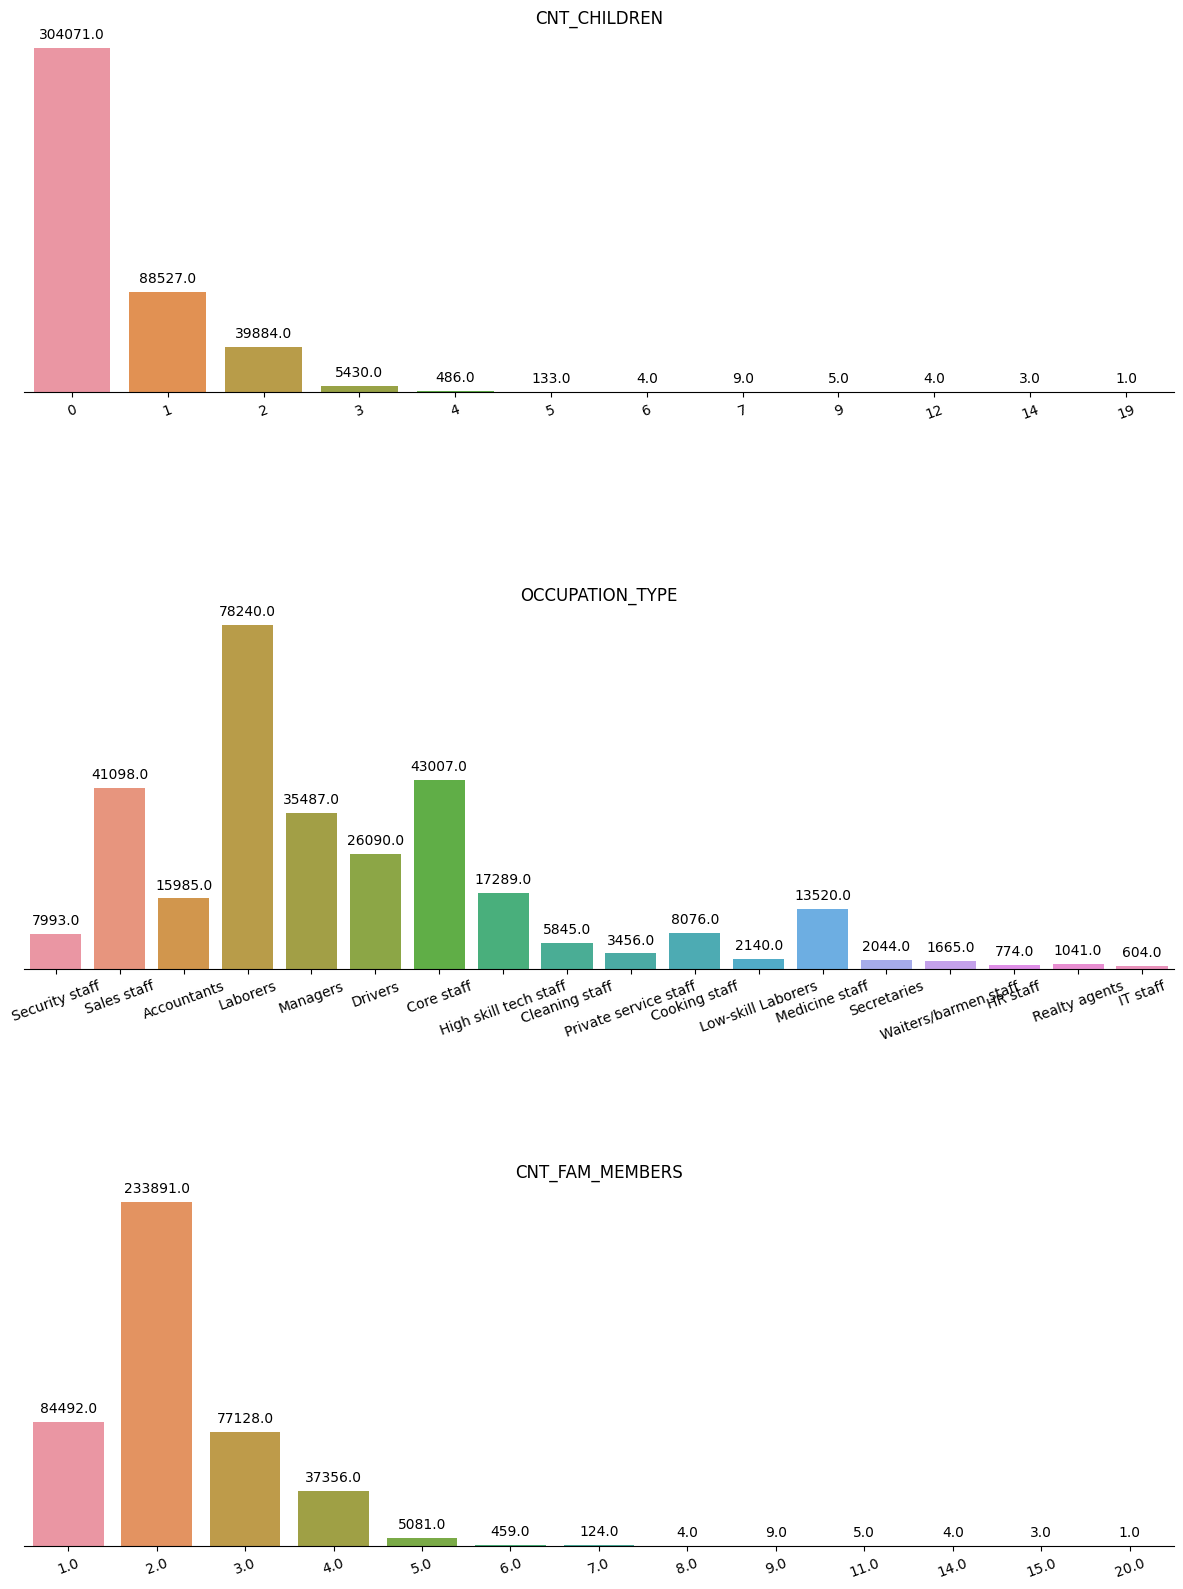

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 16))
columns_to_plot = ['CNT_CHILDREN', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 1, i+1)
    ax = sns.countplot(x=column, data=df_application)
    ax.set(yticklabels=[])
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=20)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks([])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
   

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()

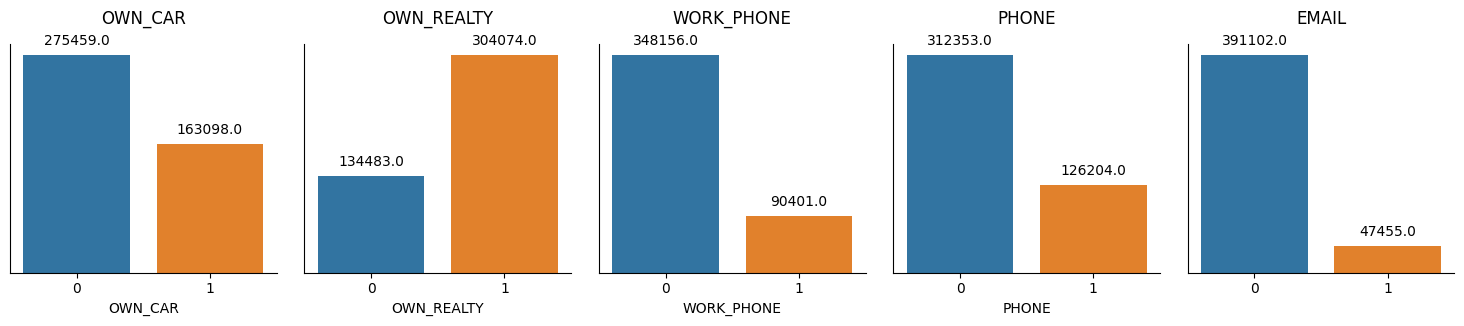

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
columns_to_plot = ['OWN_CAR', 'OWN_REALTY', 'WORK_PHONE', 'PHONE', 'EMAIL']

for i, column in enumerate(columns_to_plot):
    value_counts = df_application[column].value_counts()
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    ax.set(yticklabels=[])
    axes[i].set_title(column, y=1.05)
    plt.xlabel('')
    plt.ylabel('')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks([])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
   

plt.tight_layout(pad = 2)
plt.subplots_adjust(hspace=0.6, top=1)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for col in cat_columns:
    globals()['LE_{}'.format(col)] = LabelEncoder()
    df_application[col] = globals()['LE_{}'.format(col)].fit_transform(df_application[col])

In [14]:
df_credit['STATUS'] = df_credit['STATUS'].isin(['C', 'X', '0', '1'])

# Model creation

In [15]:
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
df_final = pd.merge(df_application, df_credit, on='ID', how='inner')
features = df_final.drop(['STATUS'], axis=1)
labels = df_final['STATUS']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 1)

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.99629
   0       1
0  0     577
1  0  154966
[[0. 1.]
 [0. 1.]]


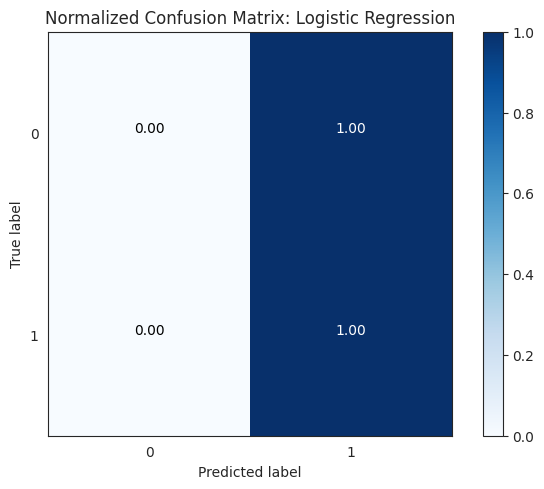

In [19]:
model = LogisticRegression(C=0.8, random_state=0)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')